In [120]:
#importing libraries
import dlib
import face_recognition
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np

In [98]:
#reading images
image= cv2.imread('modi.jpg')
modi= cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image2=cv2.imread('Xi_jingping.jpg')
xi_jingping= cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
image3=cv2.imread('Barack_obama.jpg')
obama=cv2.cvtColor(image3,cv2.COLOR_BGR2RGB)

In [99]:
#encoding images
face_modi_encoding= face_recognition.face_encodings(modi)[0]
face_xi_encoding= face_recognition.face_encodings(xi_jingping)[0]
face_obama_encoding= face_recognition.face_encodings(obama)[0]   

In [100]:
#creating a directory of known encodings
known_encodings=[face_modi_encoding,face_obama_encoding,face_xi_encoding]

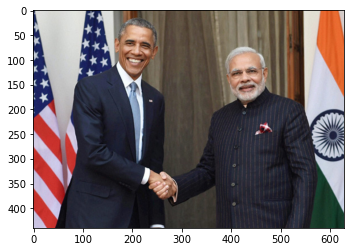

In [127]:
#testing the model
image= cv2.imread('modiobama.jpg')
modi2= cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(modi2)

In [128]:
unknown_encodings= face_recognition.face_encodings(modi2)


In [13]:
#importing library to calculate euclidean distance
from scipy.spatial import distance

In [129]:
 for unknown in unknown_encodings:
    results=[]
    for known in known_encodings:
        d=distance.euclidean(known,unknown)
        results.append(d)
    thershold=0.5
    results=np.array(results)<=thershold
    name="unknown"
    if results[0]:
        name="modi"
    elif results[1]:
        name="obama"
    elif results[2]:
        name="jingping"
    print(f"found {name}")    

found obama
found modi


## conclusion
the face_recognition model performs real good with frontal images and images that are slightly tilted to the side
But if we check with the 'Barack_modi_side.jpg' we can see that the model only recognised obama but didn;t recognise modi
In these cases a CNN based model in the dlib library 'cnn_face_detection_model_v1' performs better than face_recognition